# Lognormal model for the magnification PDF

**Author:** Pierre Fleury

We model the probability density function (PDF) of the magnification of GW sources with a shifted log-normal distribution
$$
p(\mu) =
\frac{1}{\sqrt{2\pi} \sigma (\mu - \mu_{\rm min})} \,
\exp\left\{- \frac{[\ln(\mu - \mu_{\rm min}) - m]^2}{2\sigma^2} \right\}
$$
for $\mu>\mu_{\rm min}$ and $0$ otherwise. The miniumum magnification is set by Zel'dovich's empty-beam case:
$$
\mu_{\rm min}(z)
= \left[\frac{D_{\rm A}(z)}{\lambda(z)}\right]^2
< 1\ ,
$$
where $\lambda(z)$ denotes the affine parameter, which is also the angular diameter distance in the absence of focusing (empty beam),
$$
\lambda(z) = \int_0^z \frac{{\rm d}\zeta}{(1+\zeta)^2 H(\zeta)} \ ,
$$
while $D_{\rm A}(z)$ is the standard FLRW angular diameter distance.

The other parameters are set as follows: if sources are homogeneously distributed in space -- and not in angles -- their magnification averages to unity (see e.g. https://arxiv.org/abs/2012.07802 and references therein). This imposes
$$
1 = \langle \mu \rangle = \mu_{\rm min} + {\rm e}^{m + \sigma^2/2}.
$$
Besides, we use that, at second order in the lensing convergence $\kappa$, the standard deviation of the magnification is twice the standard deviation of the convergence $\sigma_\kappa^2$ of the convergence, which can be predicted from weak lensing (see the notebook variance_convergence). We thus have
$$
2\sigma_{\kappa}
= \sigma_\mu = {\rm e}^{m + \sigma^2/2} \sqrt{{\rm e}^{\sigma^2} - 1}
= (1 - \mu_{\rm min}) \sqrt{{\rm e}^{\sigma^2} - 1}\ .
$$

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import integrate

# Use TeX
from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif')
matplotlib.rcParams.update({'font.size': 18})

import sys
sys.path.append('../')

## Define cosmology and create lensing class

In [2]:
from cosmology.cosmo import Cosmology
from cosmology.lensing import Lensing

cosmopars = {'Omega_m': 0.315,
             'H0': 67.4}

cosmo = Cosmology(cosmopars)
lensing = Lensing(cosmo)

## Minimum magnification $\mu_{\rm min}(z)$

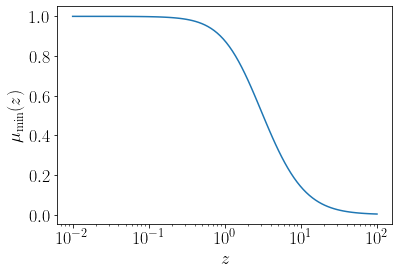

In [3]:
z = np.logspace(-2, 2, 100)
mu = lensing.mu_min(z)
plt.semilogx(z, mu)
plt.xlabel(r'$z$')
plt.ylabel(r'$\mu_{\rm min}(z)$')
#plt.savefig("mu_min.pdf", format='pdf', transparent=True, bbox_inches='tight')
plt.show()

## Standard deviation of the convergence $\sigma_\kappa(z)$

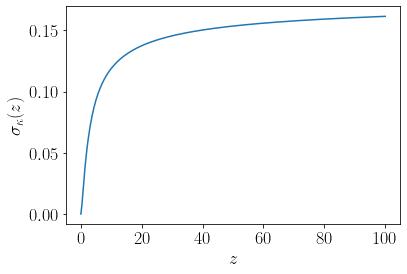

In [4]:
z = np.linspace(0, 100, 300)
sigma = lensing.std_dev_convergence(z)
plt.plot(z, sigma)
plt.xlabel(r'$z$')
plt.ylabel(r'$\sigma_{\kappa}(z)$')
plt.show()

## Magnification PDF

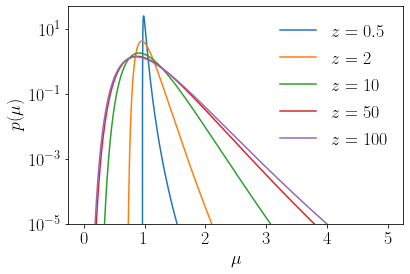

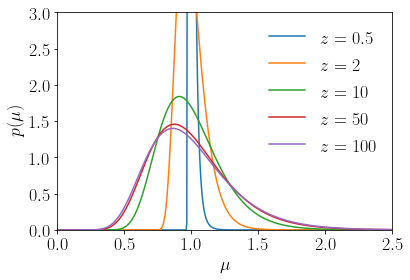

In [5]:
mu = np.linspace(0, 5, 1000)

for z in [0.5, 2, 10, 50, 100]:
    p = [lensing.pdf_magnification(mu_, z) for mu_ in mu]
    plt.semilogy(mu, p, label=r'$z = {}$'.format(z))
plt.legend(frameon=False)  
plt.ylim([1e-5, 5e1])
plt.xlabel('$\mu$')
plt.ylabel('$p(\mu)$')
#plt.savefig("PDF_magnification.pdf", format='pdf', transparent=True, bbox_inches='tight')
plt.show()

for z in [0.5, 2, 10, 50, 100]:
    p = [lensing.pdf_magnification(mu_, z) for mu_ in mu]
    plt.plot(mu, p, label=r'$z = {}$'.format(z))
plt.legend(frameon=False) 
plt.xlim([0, 2.5])
plt.ylim([0, 3])
plt.xlabel('$\mu$')
plt.ylabel('$p(\mu)$')
plt.show()

Check the values of integrals of the pdf

In [6]:
for z in [0.456, 14.32, 56.9]:

    # normalisation
    integrand = lambda mu: lensing.pdf_magnification(mu, z)
    norm, err = integrate.quad(integrand, 0, np.inf)
    # mean
    integrand = lambda mu: lensing.pdf_magnification(mu, z) * mu
    mean, err = integrate.quad(integrand, 0, np.inf)
    # standard deviation
    integrand = lambda mu: lensing.pdf_magnification(mu, z) * mu**2
    mean_sqr, err = integrate.quad(integrand, 0, np.inf)
    std_dev = np.sqrt(mean_sqr - mean**2)

    print("""
    -- z = {} --
    <1> - 1 = {}
    <mu> - 1 = {}
    sigma_mu / sigma_mu_th - 1= {}
    """.format(z, norm - 1, mean - 1, std_dev / 2 / lensing.std_dev_convergence(z) - 1))


    -- z = 0.456 --
    <1> - 1 = -5.329070518200751e-15
    <mu> - 1 = -5.329070518200751e-15
    sigma_mu / sigma_mu_th - 1= 5.757838650310987e-12
    

    -- z = 14.32 --
    <1> - 1 = -1.5543122344752192e-15
    <mu> - 1 = 2.220446049250313e-16
    sigma_mu / sigma_mu_th - 1= -1.5543122344752192e-15
    

    -- z = 56.9 --
    <1> - 1 = 2.220446049250313e-16
    <mu> - 1 = 4.440892098500626e-16
    sigma_mu / sigma_mu_th - 1= -4.9960036108132044e-15
    


## Samples and theoretical PDF

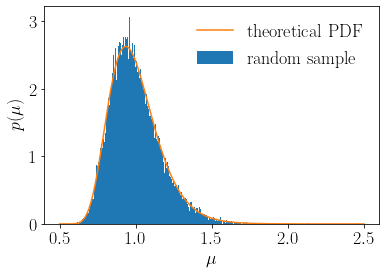

In [7]:
z = 4
size_sample = 100000
mu_sample = lensing.draw_magnification(z=z, size=size_sample)
mu = np.linspace(0.5, 2.5, 1000)
pdf_th = [lensing.pdf_magnification(mu_, z) for mu_ in mu]

plt.hist(mu_sample, bins=1000, density=True, label="random sample")
plt.plot(mu, pdf_th, label="theoretical PDF")
plt.xlabel("$\mu$")
plt.ylabel("$p(\mu)$")
plt.legend(frameon=False)
plt.show()